<a href="https://colab.research.google.com/github/Abhilash3836/hello-world/blob/master/face%20recognition%20and%20detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#importing libraries
import face_recognition
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle,Circle
import numpy as np
import cv2
%matplotlib inline


In [5]:
#reading image 
img = cv2.imread('elon.jpg')
elon = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

img = cv2.imread('jeff.jpg')
jeff = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

img = cv2.imread('bill.jpg')
bill = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

In [9]:
#encoding
elon_encoding = face_recognition.face_encodings(elon)[0]
jeff_encoding = face_recognition.face_encodings(jeff)[0]
bill_encoding = face_recognition.face_encodings(bill)[0]

known_face_encodings = [
    elon_encoding,
    jeff_encoding,
    bill_encoding
]

3 face(s)


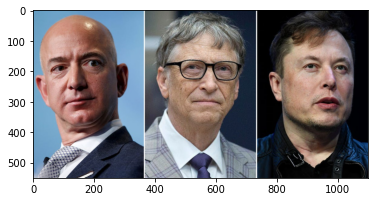

In [53]:
#reading unknown images
img = cv2.imread('bill-elon-jeff.jpg')
unknown = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(unknown)
unknown_face_encodings = face_recognition.face_encodings(unknown)

#number of faces
face_locations = face_recognition.face_locations(unknown)
number_of_faces = len(face_locations)
print('{} face(s)'.format(number_of_faces))


elon musk
bill gates
Jeff Bezos


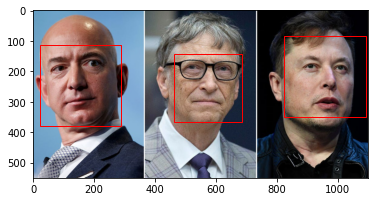

In [54]:
#finding euclidean distance
from scipy.spatial import distance

for unknown_face_encoding in unknown_face_encodings:
  result = []
  for known_face_encoding in known_face_encodings:
    d = distance.euclidean(known_face_encoding,unknown_face_encoding)
    result.append(d)
  threshold = 0.6
  result = np.array(result) <= threshold

  name = 'unknown'
  if result[0]:
    name = 'elon musk'
  elif result[1]:
    name = 'Jeff Bezos'
  elif result[2]:
    name = 'bill gates'

  print(name)
plt.imshow(unknown)
ax = plt.gca()

for face_location in face_locations:
  top,right,bottom,left = face_location
  x,y,w,h = left,top,right,bottom

  rect = Rectangle((x,y), w-x, h-y, fill = False, color='red')
  ax.add_patch(rect)
plt.show()


